In [49]:
from car import Car
from road import Road
from simulation import Simulation
import numpy as np
from unittest import mock
import matplotlib.pyplot as plt
#from statistics import mean, stdev as mean, stdev
import statistics as st

In [2]:
%matplotlib inline

In [3]:

def make_cars(num=10, slowing_chance=0.2, desired_speed=33.333, length=1000):
    road = Road(length=length)
    start_positions = list(np.linspace(length,0,num+1))[1:]
    cars = []
    for i in start_positions:
        car = Car(road, position=i, slowing_chance=slowing_chance, desired_speed=desired_speed) # reverse order required here...
        cars.append(car)
    return cars

In [13]:
def run_sim(cars, discard_steps=60, run_steps=300):
    sim = Simulation(cars=cars, steps=discard_steps)
    sim.start()
    sim.run()

    sim = Simulation(cars=cars, steps=run_steps)

    sim.start()
    positions, speeds = sim.run()
    return positions, speeds, speeds[:, 0].mean(), speeds[:, 0].std()

In [23]:
def plot_sim(title, cars, positions, speeds):
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(title)
    for i in range(0, len(cars), 5):
        plt.scatter(range(len(positions)), positions[:,i], marker='_')#, speeds[:,i])
        plt.scatter(range(len(positions)), positions[:,i+1], c='r', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+2], c='g', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+3], c='y', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+4], c='m', marker='_')#, speeds[:,i+1], c='g')
        plt.subplots_adjust(left=2, right=4)
    avg = speeds[:, 0].mean()
    stdev = speeds[:, 0].std()
    print('mean: {} std: {}'.format(avg, stdev))
    return avg, stdev

In [6]:
n = 30
sc = 0.1
ds = 33.333
cars = make_cars(n, slowing_chance=sc, desired_speed=ds)

In [8]:
%%capture
positions, speeds, avg, stdev = run_sim(discard_steps=60, run_steps=1000)

mean: 26.625707292707283 std: 4.819544455078953


(26.625707292707283, 4.8195444550789528)

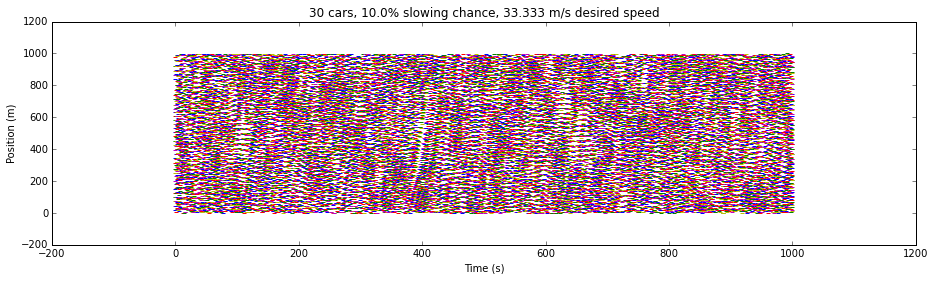

In [9]:
plot_sim('{} cars, {}% slowing chance, {} m/s desired speed'.format(n, sc*100, ds))

In [24]:
def run_trial(num_trials=100, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000):
    data = []
    cars = []
    positions = []
    speeds = []
    for i in range(num_trials):
        cars = make_cars(num=num_cars, slowing_chance=slowing_chance, desired_speed=desired_speed)
        (positions, speeds, avg, stdev) = run_sim(cars=cars, discard_steps=discard_steps, run_steps=run_steps)
        data.append((positions, speeds, avg, stdev))
    
    plot_sim('{} cars, {}% slowing chance, {} m/s desired speed'.format(
            num_cars, slowing_chance*100, desired_speed),
            cars, positions, speeds
            )
    return data

In [61]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 100;

<IPython.core.display.Javascript object>

id#60 lead_distance 195.0, current speed: 15
id#61 lead_distance 195.0, current speed: 15
id#62 lead_distance 195.0, current speed: 15
id#63 lead_distance 195.0, current speed: 15
id#64 lead_distance 195.0, current speed: 15
id#60 lead_distance 195.0, current speed: 17
id#61 lead_distance 195.0, current speed: 17
id#62 lead_distance 195.0, current speed: 17
id#63 lead_distance 195.0, current speed: 17
id#64 lead_distance 195.0, current speed: 17
id#60 lead_distance 195.0, current speed: 19
id#61 lead_distance 195.0, current speed: 19
id#61 Slowing
id#62 lead_distance 195.0, current speed: 19
id#63 lead_distance 195.0, current speed: 19
id#64 lead_distance 195.0, current speed: 19
id#60 lead_distance 195.0, current speed: 21
id#61 lead_distance 199.0, current speed: 17
id#62 lead_distance 191.0, current speed: 21
id#63 lead_distance 195.0, current speed: 21
id#63 Slowing
id#64 lead_distance 195.0, current speed: 21
id#60 lead_distance 195.0, current speed: 23
id#60 Slowing
id#61 lead_di

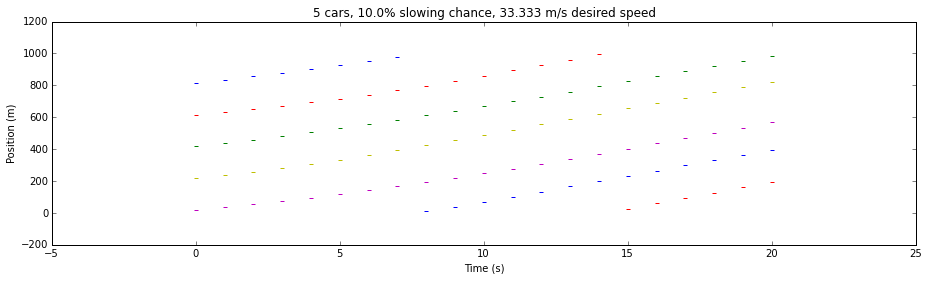

In [60]:
data = run_trial(num_trials=2, discard_steps=0, run_steps=20, num_cars=5,
              slowing_chance=0.1, desired_speed=33.333, length=1000)

In [28]:
data

[(array([[ 813.,  617.,  417.,  217.,   17.],
         [ 828.,  632.,  436.,  236.,   36.],
         [ 845.,  649.,  457.,  253.,   57.]]),
  array([[ 13.,  17.,  17.,  17.,  17.],
         [ 15.,  15.,  19.,  19.,  19.],
         [ 17.,  17.,  21.,  17.,  21.]]),
  15.0,
  1.6329931618554521),
 (array([[ 817.,  617.,  413.,  217.,   17.],
         [ 836.,  636.,  428.,  236.,   36.],
         [ 857.,  657.,  445.,  257.,   57.]]),
  array([[ 17.,  17.,  13.,  17.,  17.],
         [ 19.,  19.,  15.,  19.,  19.],
         [ 21.,  21.,  17.,  21.,  21.]]),
  19.0,
  1.6329931618554521)]

In [62]:
means, stdevs = [i[2] for i in data], [i[3] for i in data]

In [63]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 28.571285714285708, St Dev: 0.3065834708819556


id#160 lead_distance 28.0, current speed: 15
id#161 lead_distance 28.0, current speed: 15
id#161 Slowing
id#162 lead_distance 28.0, current speed: 15
id#162 Slowing
id#163 lead_distance 28.0, current speed: 15
id#164 lead_distance 28.0, current speed: 15
id#164 Slowing
id#165 lead_distance 28.0, current speed: 15
id#166 lead_distance 28.0, current speed: 15
id#167 lead_distance 28.0, current speed: 15
id#168 lead_distance 28.0, current speed: 15
id#168 Slowing
id#169 lead_distance 28.0, current speed: 15
id#170 lead_distance 28.0, current speed: 15
id#171 lead_distance 28.0, current speed: 15
id#172 lead_distance 28.0, current speed: 15
id#173 lead_distance 28.0, current speed: 15
id#174 lead_distance 28.0, current speed: 15
id#175 lead_distance 28.0, current speed: 15
id#176 lead_distance 28.0, current speed: 15
id#177 lead_distance 28.0, current speed: 15
id#178 lead_distance 28.0, current speed: 15
id#179 lead_distance 28.0, current speed: 15
id#180 lead_distance 28.0, current speed

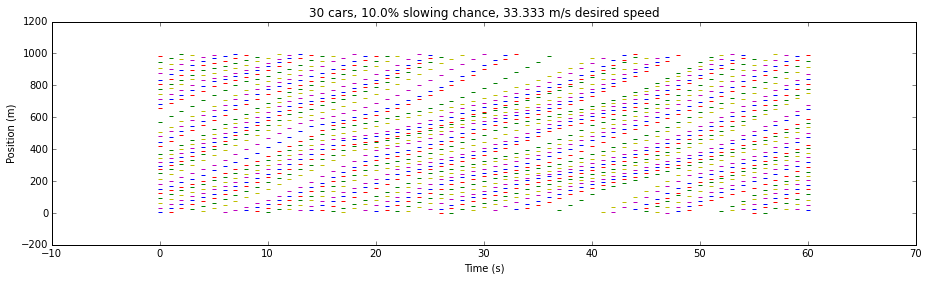

In [70]:
data = run_trial(num_trials=20, discard_steps=60, run_steps=60, num_cars=30,
              slowing_chance=0.1, desired_speed=33.333, length=1000)
means, stdevs = [i[2] for i in data], [i[3] for i in data]


In [71]:
print('Average speed: {}, St Dev: {}'.format(st.mean(means), st.stdev(stdevs)))

Average speed: 26.062134426229512, St Dev: 1.0562699282770918
